In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df=pd.read_csv('diabetes.csv',index_col=0)

In [38]:
df.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


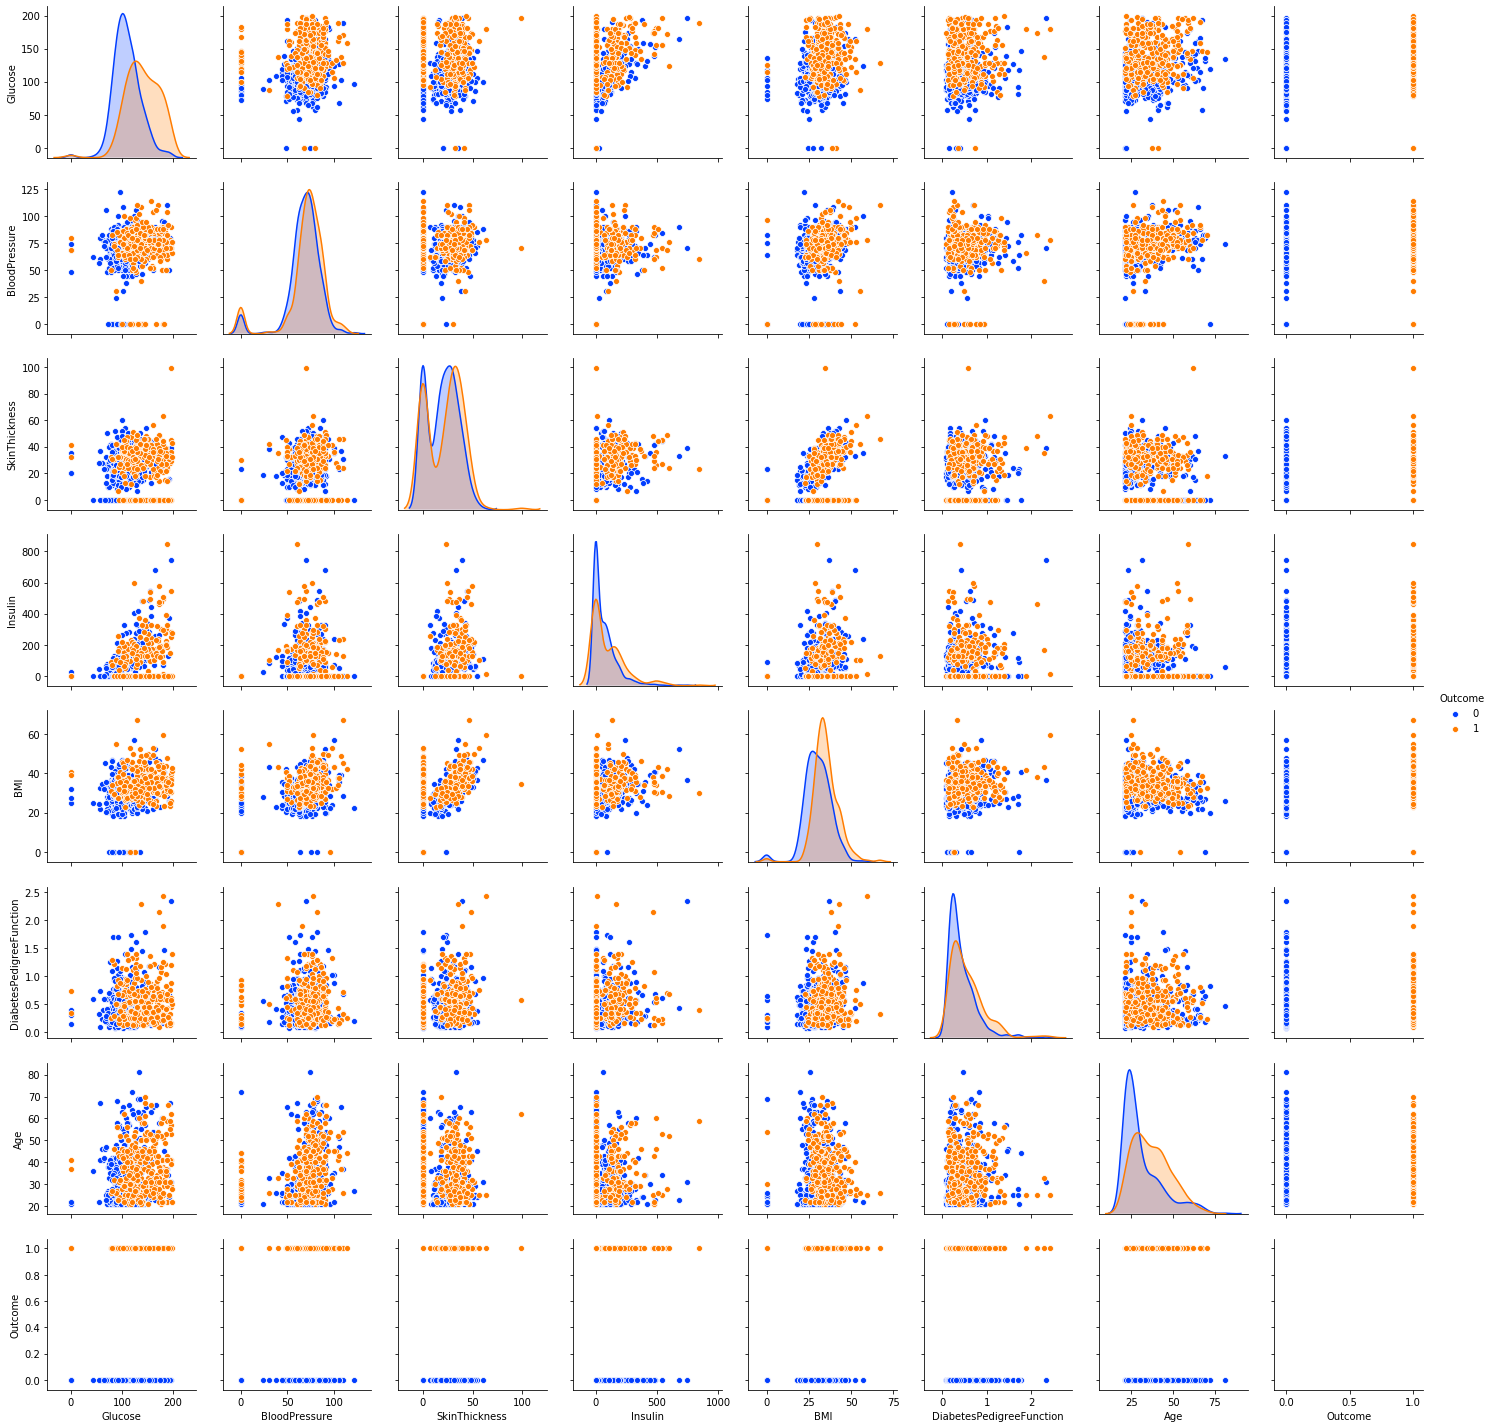

In [40]:
sns.pairplot(df,hue='Outcome',palette='bright')

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_feat=scaler.transform(df.drop('Outcome',axis=1))

In [45]:
df_feat=pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [46]:
df_feat.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [114]:
X = df_feat
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn=KNeighborsClassifier(n_neighbors=1)

In [128]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [129]:
pred = knn.predict(X_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(confusion_matrix(y_test,pred))

[[177  43]
 [ 53  73]]


In [132]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       220
           1       0.63      0.58      0.60       126

    accuracy                           0.72       346
   macro avg       0.70      0.69      0.69       346
weighted avg       0.72      0.72      0.72       346



In [133]:
error_rate=[]
for i in range(1,80):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K Value')

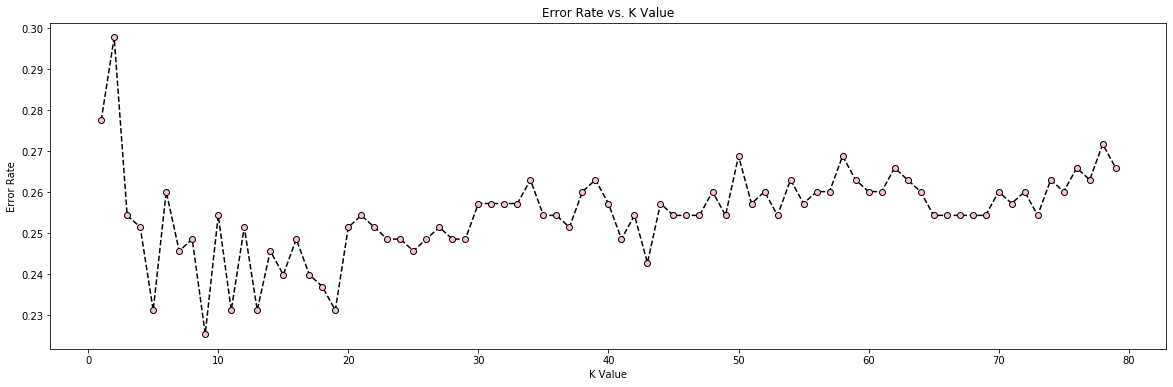

In [134]:
plt.figure(figsize=(20,6))
plt.plot(range(1,80),error_rate,color='black',linestyle='dashed',marker='o',markerfacecolor='pink')
plt.title('Error Rate vs. K Value')
plt.ylabel('Error Rate')
plt.xlabel('K Value')

In [135]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [136]:
print(confusion_matrix(y_test,pred))

[[187  33]
 [ 45  81]]


In [137]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       220
           1       0.71      0.64      0.67       126

    accuracy                           0.77       346
   macro avg       0.76      0.75      0.75       346
weighted avg       0.77      0.77      0.77       346

